In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
model_name = "GEMM_STREAM_VMID=4034"

In [3]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [4]:
gpa_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,360547,0,4.347611,4.347611,0.000000,0.000000
1,1,114246,246301,13.720550,9.372940,0.157129,0.157129
2,2,56586,57660,27.701516,13.980966,0.230697,0.073569
3,3,33941,22645,46.183613,18.482096,0.274036,0.043339
4,4,21362,12579,73.378803,27.195191,0.306136,0.032099
5,5,13747,7615,114.026188,40.647384,0.330426,0.024290
6,6,8976,4771,174.634358,60.608171,0.348688,0.018262
7,7,6031,2945,259.910131,85.275773,0.361839,0.013151
8,8,4135,1896,379.085369,119.175238,0.371515,0.009676
9,9,3002,1133,522.157895,143.072526,0.378021,0.006505


In [5]:
rip_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,26252,0,59.710422,59.710422,0.000000,0.000000
1,1,6352,19900,246.775504,187.065082,0.012696,0.012696
2,2,3807,2545,411.746257,164.970753,0.015943,0.003247
3,3,2825,982,554.873628,143.127371,0.017822,0.001879
4,4,2245,580,698.226281,143.352652,0.019302,0.001480
5,5,1913,332,819.403032,121.176751,0.020361,0.001059
6,6,1648,265,951.163835,131.760803,0.021376,0.001014
7,7,1469,179,1067.064670,115.900835,0.022175,0.000799
8,8,1314,155,1192.936073,125.871403,0.022966,0.000791
9,9,1186,128,1321.684654,128.748581,0.023701,0.000735


In [6]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])

    # target_1 = "p"
    # target_1 = "p'"
    target_1 = "ratio'"
    target_2 = "upper limit for train/val accuracy"
    # target_2 = "accuracy'"
    
    color_1 = 'tab:red'
    ax_1.set_ylabel(target_1, color=color_1)
    ax_1.plot(df["threshold"], df[target_1], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel(target_2, color=color_2)
    ax_2.plot(df["threshold"], df[target_2], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    plt.show()

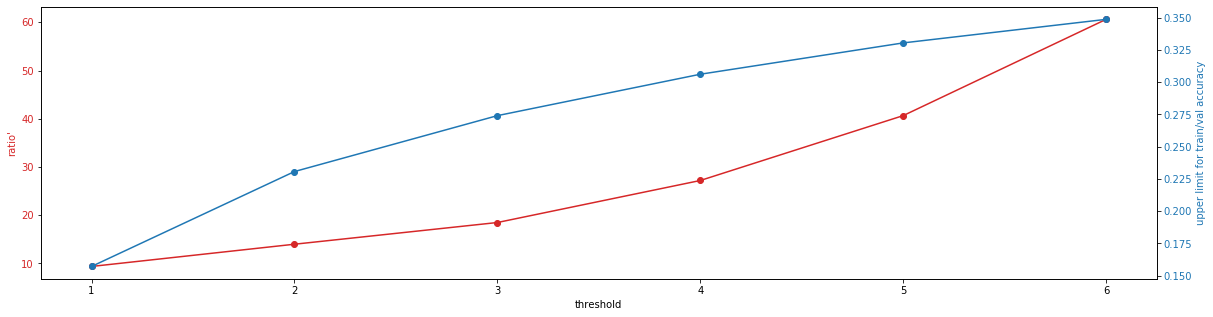

In [7]:
analysis_visualize(gpa_analysis[1:7])

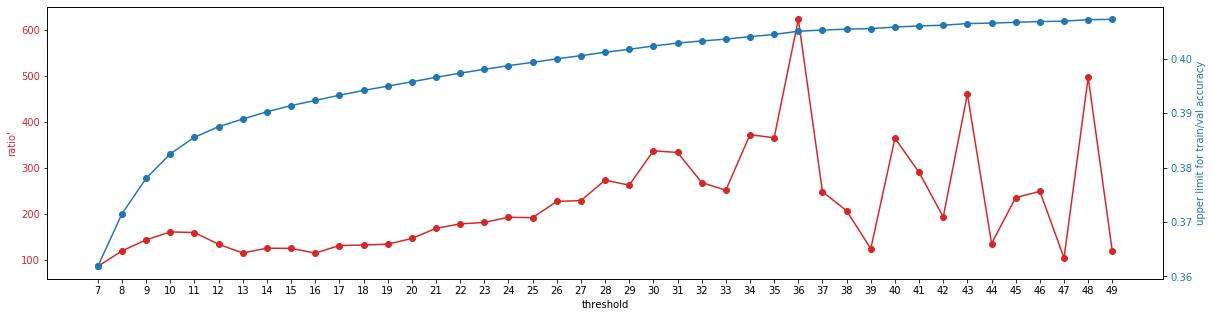

In [8]:
analysis_visualize(gpa_analysis[7:])

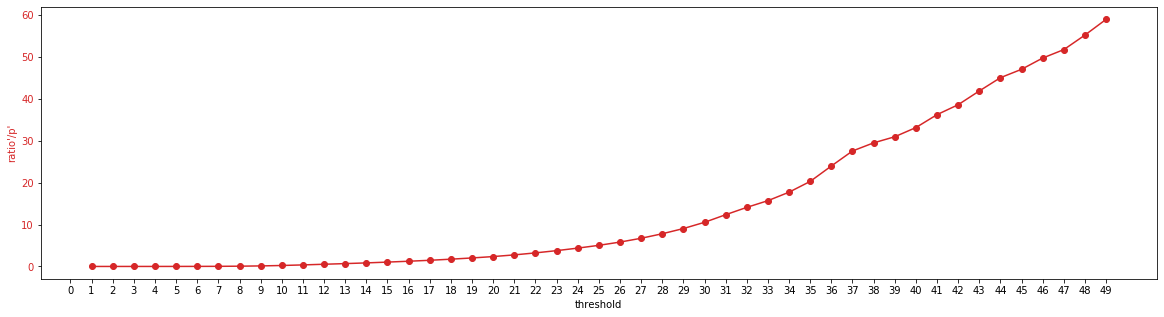

In [9]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio'/p'", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["ratio'"]/gpa_analysis["p'"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()